In [2]:

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

dataset_1=pd.read_csv('/content/drive/MyDrive/housing_data.csv')#load first dataset in CSV format
dataset_1

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [5]:
dataset_1.shape

(1460, 81)

In [6]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##now filling the null values

In [7]:
##Now as we can see the nonnull values in the data, take the columns filled with less than total number of rows and fill the missing values
nuldatacolumns = dataset_1[['MasVnrType', 'Alley', 'GarageYrBlt', 'Electrical']]
nuldatacolumns.isnull().sum()

MasVnrType      872
Alley          1369
GarageYrBlt      81
Electrical        1
dtype: int64

In [8]:

nuldatacolumns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MasVnrType   588 non-null    object 
 1   Alley        91 non-null     object 
 2   GarageYrBlt  1379 non-null   float64
 3   Electrical   1459 non-null   object 
dtypes: float64(1), object(3)
memory usage: 45.8+ KB


As we saw, only one column "Alley" has a significant amount of null values. a narrow passage between buildings or other structures.In that case, the absence of Alley represents no information loss.henece will remove the column

In [9]:
##now i will drop Alley as it has high number of missing values
nuldatacolumns= nuldatacolumns.drop(['Alley'],axis=1)
nuldatacolumns= nuldatacolumns.drop(['MasVnrType'],axis=1)

In [10]:
nuldatacolumns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GarageYrBlt  1379 non-null   float64
 1   Electrical   1459 non-null   object 
dtypes: float64(1), object(1)
memory usage: 22.9+ KB


now will fill the object datat by mode and intiger datata by mean value

In [11]:
nuldatacolumns['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [12]:
nuldatacolumns['Electrical'].fillna(nuldatacolumns['Electrical'].mode()[0], inplace = True)

In [13]:
nuldatacolumns['Electrical'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Electrical
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [14]:
nuldatacolumns['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [15]:
nuldatacolumns.isnull().sum()

GarageYrBlt    81
Electrical      0
dtype: int64

In [16]:
nuldatacolumns = nuldatacolumns.fillna(nuldatacolumns['GarageYrBlt'].mean())
print(nuldatacolumns)

      GarageYrBlt Electrical
0          2003.0      SBrkr
1          1976.0      SBrkr
2          2001.0      SBrkr
3          1998.0      SBrkr
4          2000.0      SBrkr
...           ...        ...
1455       1999.0      SBrkr
1456       1978.0      SBrkr
1457       1941.0      SBrkr
1458       1950.0      FuseA
1459       1965.0      SBrkr

[1460 rows x 2 columns]


In [17]:
##check if there is a null value
nuldatacolumns.isnull().sum()

GarageYrBlt    0
Electrical     0
dtype: int64

In [18]:
dataset_1.update(nuldatacolumns[['GarageYrBlt', 'Electrical']])
dataset_1

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [19]:

dataset_1=dataset_1.drop(['Alley'],axis=1)
dataset_1=dataset_1.drop(['MasVnrType'],axis=1)
dataset_1=dataset_1.drop(['Unnamed: 0'],axis=1)

In [20]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [21]:
numerical_list = []
categorical_list = []

for col in dataset_1.columns:
  if dataset_1[col].dtype == "object":
    {
    categorical_list.append(col)
    }
  else:
    {
      numerical_list.append(col)

    }


In [22]:
print(numerical_list)
print(categorical_list)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']
['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'P

In [23]:
categorical_list

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [24]:
dataset_1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


##EDA

##Univariant Analysis

<ipython-input-25-cc20589059cd>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0, 0.5, 'Counts')

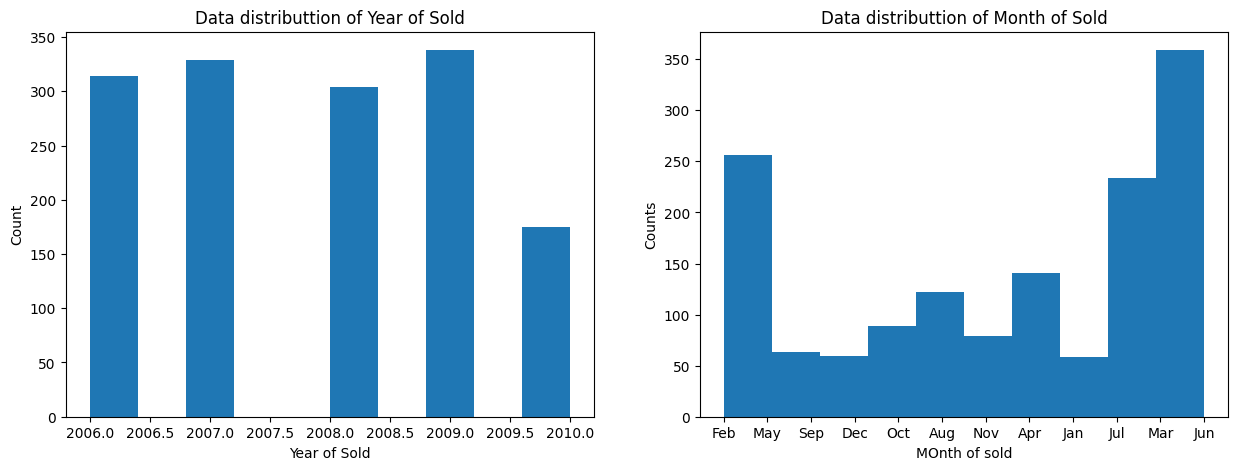

In [25]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
dataset_1['YrSold']
plt.hist(dataset_1['YrSold'])
plt.title('Data distributtion of Year of Sold')
plt.xlabel('Year of Sold')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(dataset_1['MoSold'])
plt.title('Data distributtion of Month of Sold')
plt.xlabel('MOnth of sold')
plt.ylabel('Counts')

<ipython-input-49-b0342f090b81>:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



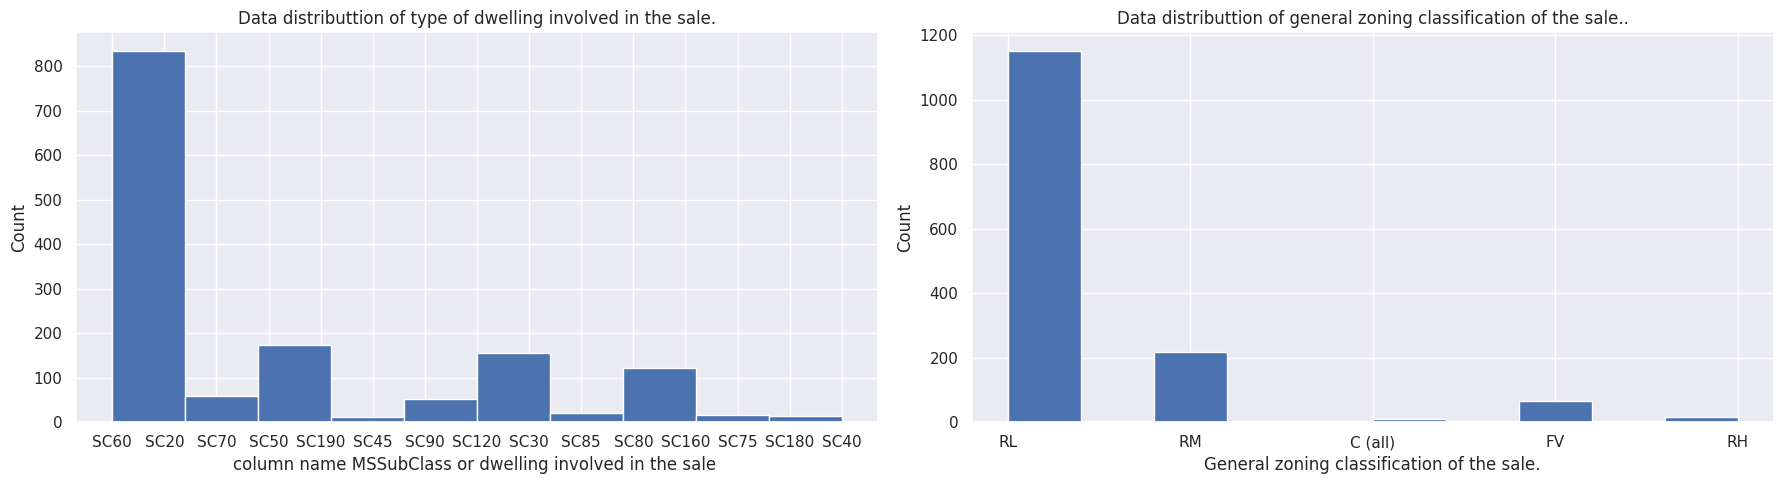

In [49]:

plt.subplots(figsize=(18, 5))
plt.subplot(1, 2, 1)
dataset_1['MSSubClass']
plt.hist(dataset_1['MSSubClass'])
plt.title('Data distributtion of type of dwelling involved in the sale.')
plt.xlabel('column name MSSubClass or dwelling involved in the sale ')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.hist(dataset_1['MSZoning'])
plt.title('Data distributtion of general zoning classification of the sale..')
plt.xlabel('General zoning classification of the sale.')
plt.ylabel('Count')
plt.tight_layout()

<ipython-input-81-8e1dee0ddb1e>:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



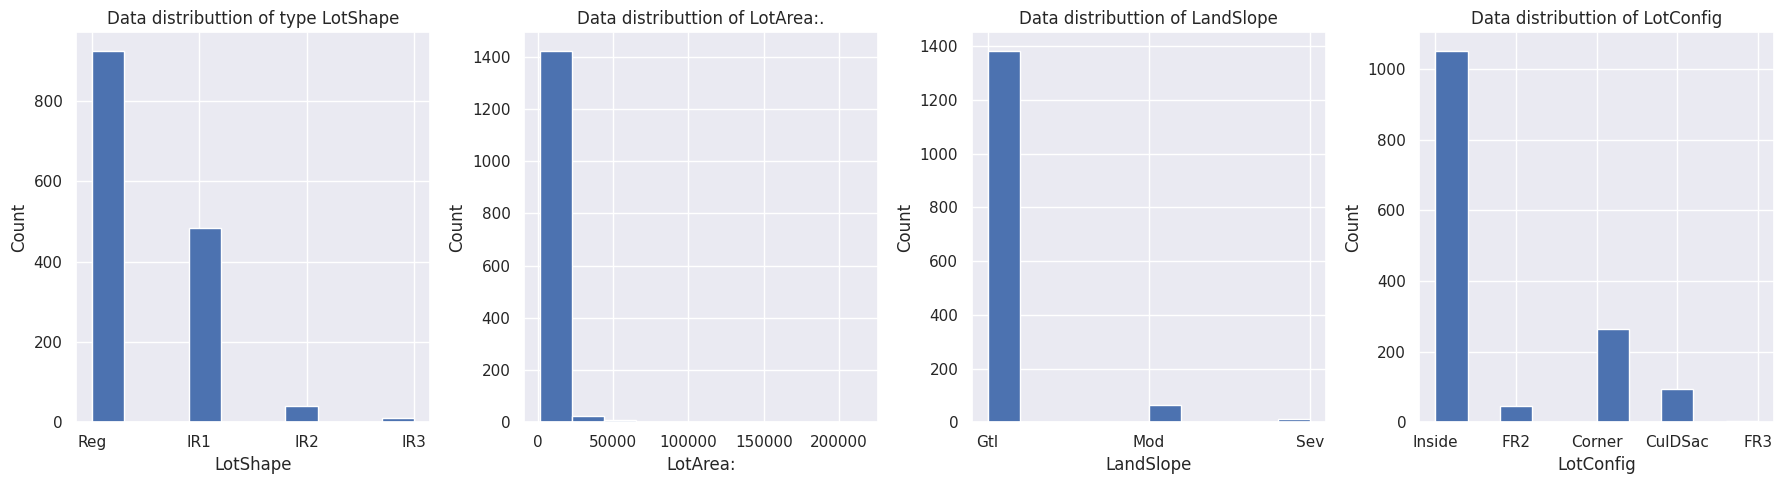

In [81]:
plt.subplots(figsize=(18, 5))
plt.subplot(1, 4, 1)
dataset_1['LotShape']
plt.hist(dataset_1['LotShape'])
plt.title('Data distributtion of type LotShape')
plt.xlabel('LotShape')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(1, 4, 2)
plt.hist(dataset_1['LotArea'])
plt.title('Data distributtion of LotArea:.')
plt.xlabel('LotArea:')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(1, 4, 3)
plt.hist(dataset_1['LandSlope'])
plt.title('Data distributtion of LandSlope')
plt.xlabel('LandSlope')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(1, 4, 4)
plt.hist(dataset_1['LotConfig'])
plt.title('Data distributtion of LotConfig')
plt.xlabel('LotConfig')
plt.ylabel('Count')
plt.tight_layout()


<ipython-input-79-73b0fb1b3d41>:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



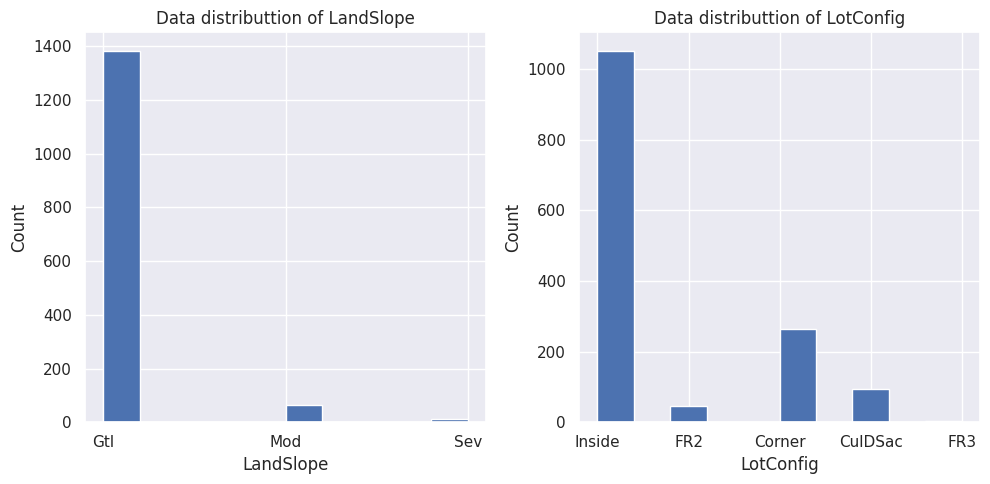

In [79]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(dataset_1['LandSlope'])
plt.title('Data distributtion of LandSlope')
plt.xlabel('LandSlope')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(1, 3, 2)
plt.hist(dataset_1['LotConfig'])
plt.title('Data distributtion of LotConfig')
plt.xlabel('LotConfig')
plt.ylabel('Count')
plt.tight_layout()

In [66]:
dataset_1['Neighborhood'].unique()


array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

<ipython-input-65-af7dc20e90e5>:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



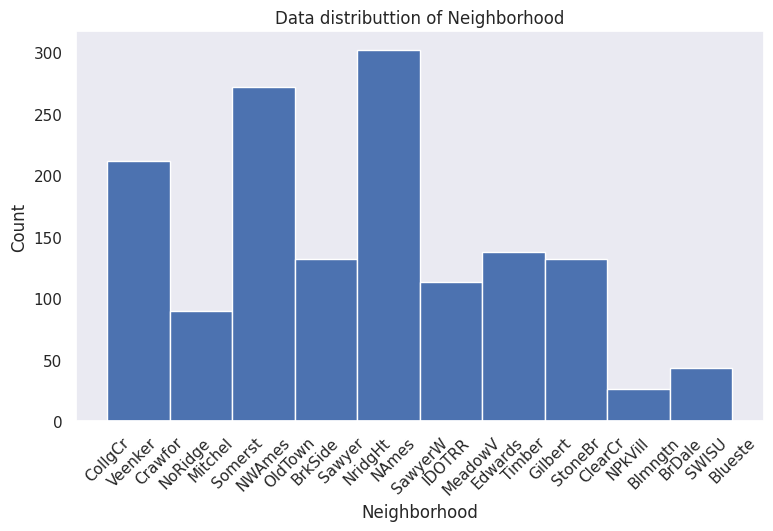

In [65]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.hist(dataset_1['Neighborhood'])
plt.title('Data distributtion of Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.tight_layout()

plt.grid();
plt.xticks(rotation = 45)
plt.show()

In [29]:
dataset_1['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [30]:
dataset_1['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

#Bivariant analysis


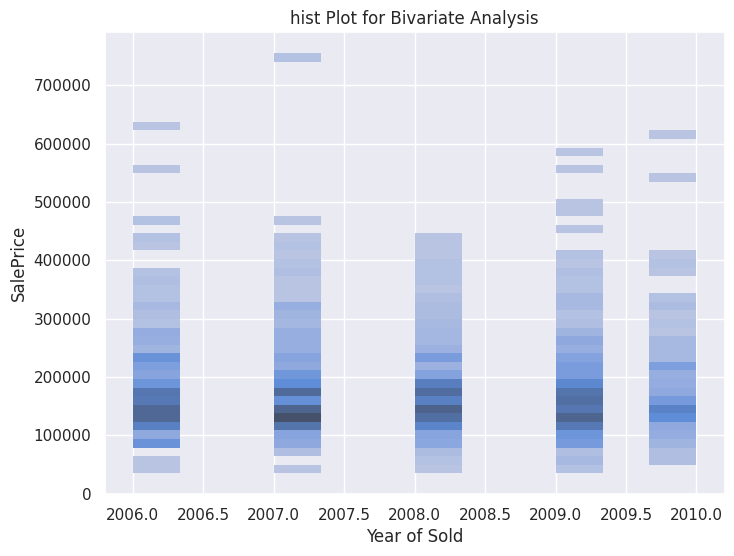

In [70]:
##year of sold V/s Saleprice

dataset_1= pd.DataFrame(dataset_1)

# Create joint plot
#sns.jointplot(data=dataset_1, x='YrSold', y='SalePrice', kind='scatter')
#plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=dataset_1, x='YrSold', y='SalePrice')
plt.title('hist Plot for Bivariate Analysis')
plt.xlabel('Year of Sold')
plt.ylabel('SalePrice')
plt.show()

<ipython-input-92-0172eb331708>:3: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



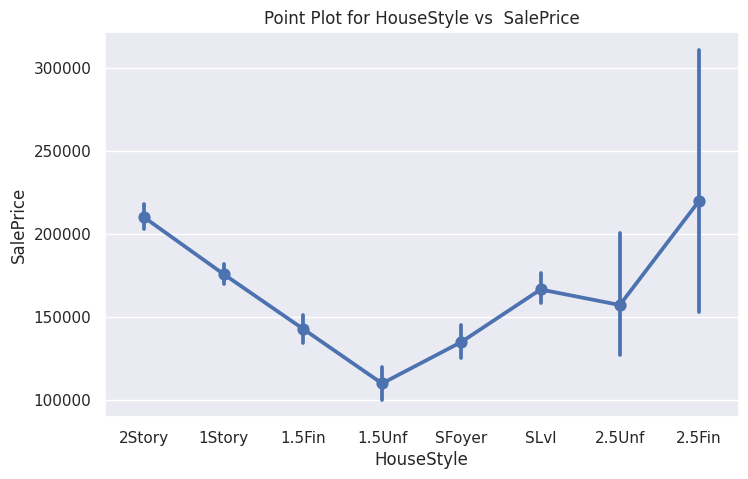

<Figure size 640x480 with 0 Axes>

In [92]:
##house style VS Saleprice
plt.subplots(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.pointplot(data=dataset_1, x='HouseStyle', y='SalePrice')
plt.title('Point Plot for HouseStyle vs  SalePrice')
plt.xlabel('HouseStyle')
plt.ylabel('SalePrice')
plt.show()
plt.tight_layout()


In [32]:
dataset_1.groupby(['LotFrontage','LotArea','LotShape']).agg({'SalePrice': 'mean'})

SalePrice
LotFrontage LotArea LotShape               
0           1974    Reg        83500.000000
            2117    Reg       174333.333333
            2651    Reg       165000.000000
            2665    Reg       115000.000000
            2887    Reg       173000.000000
...                                     ...
174         15138   IR1       403000.000000
            25419   Reg       235000.000000
182         14572   IR3       259000.000000
313         27650   IR2       242000.000000
            63887   IR3       160000.000000

[1190 rows x 1 columns]

<Figure size 10000x2000 with 0 Axes>

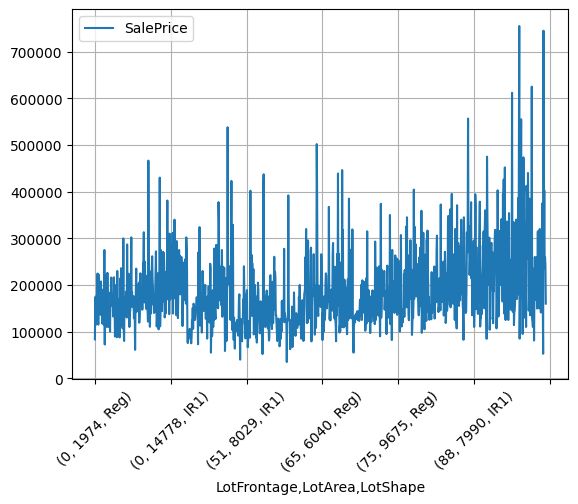

In [33]:
plt.figure(figsize = [100,20])
dataset_1.groupby(['LotFrontage','LotArea','LotShape']).agg({'SalePrice': 'mean'}).plot()

plt.grid();
plt.xticks(rotation = 45)
plt.show();

In [35]:
##Data_lotgroup=dataset_1.groupby(['LotFrontage','LotArea'])
import plotly.express as px
ax = px.scatter_3d(dataset_1, x='LotFrontage', y='LotArea', z='LotShape', template= "plotly_dark", color="SalePrice")
ax.show()

In [36]:
dataset_1.groupby(['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']).agg({'SalePrice': 'mean'})



SalePrice
GarageType GarageYrBlt GarageFinish GarageCars GarageArea GarageQual GarageCond               
2Types     1920.000000 Unf          3          779        Fa         Fa           87000.000000
           1949.000000 Unf          3          871        TA         TA          145000.000000
           1963.000000 RFn          3          995        TA         TA          186700.000000
           1975.000000 Fin          4          1356       TA         TA          168000.000000
           1989.000000 Unf          3          766        TA         TA          171000.000000
...                                                                                        ...
Detchd     2006.000000 Unf          2          576        TA         TA          158000.000000
           2007.000000 Unf          2          540        TA         TA          146000.000000
           2008.000000 Unf          1          300        Ex         Ex          127500.000000
           2009.000000 RFn          2          528        TA         TA          169116.500000
No         1978.506164 No           0          0          No         No          103317.283951

[1282 rows x 1 columns]

<Figure size 10000x2000 with 0 Axes>

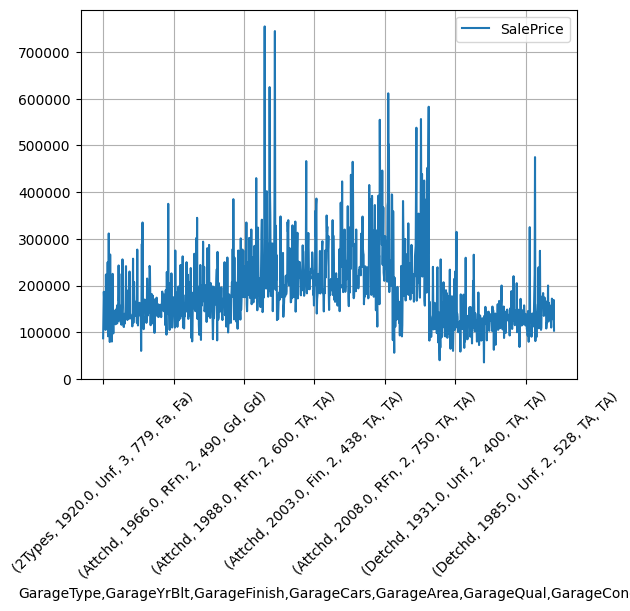

In [37]:
plt.figure(figsize = [100,20])
dataset_1.groupby(['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']).agg({'SalePrice': 'mean'}).plot()
plt.grid();
plt.xticks(rotation = 45)
plt.show();

In [38]:
dataset_1['GarageYrBlt'].unique()

array([2003.        , 1976.        , 2001.        , 1998.        ,
       2000.        , 1993.        , 2004.        , 1973.        ,
       1931.        , 1939.        , 1965.        , 2005.        ,
       1962.        , 2006.        , 1960.        , 1991.        ,
       1970.        , 1967.        , 1958.        , 1930.        ,
       2002.        , 1968.        , 2007.        , 2008.        ,
       1957.        , 1920.        , 1966.        , 1959.        ,
       1995.        , 1954.        , 1953.        , 1978.50616389,
       1983.        , 1977.        , 1997.        , 1985.        ,
       1963.        , 1981.        , 1964.        , 1999.        ,
       1935.        , 1990.        , 1945.        , 1987.        ,
       1989.        , 1915.        , 1956.        , 1948.        ,
       1974.        , 2009.        , 1950.        , 1961.        ,
       1921.        , 1900.        , 1979.        , 1951.        ,
       1969.        , 1936.        , 1975.        , 1971.     

In [39]:
dataset_1['GarageYrBlt'].max()

2010.0

In [40]:
dataset_1['SalePrice'].max()

755000

In [41]:
##Data_lotgroup=dataset_1.groupby(['LotFrontage','LotArea'])
import plotly.express as px
ax = px.scatter_3d(dataset_1, x='YrSold', y='MoSold', z='SaleType', template= "plotly_dark", color="SalePrice")
ax.show()

In [42]:
import plotly.express as px
ax = px.scatter_3d(dataset_1, x='YrSold', y='MoSold', z='SaleType', template= "plotly_dark",)
ax.show()

##Now we will Describe the dataset and remove outliers

In [45]:

dataset_1.describe()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


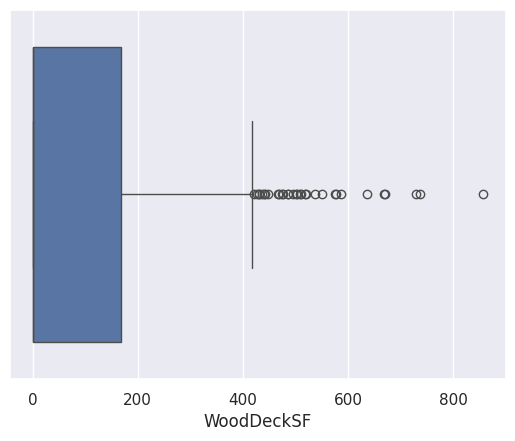

In [46]:
# Boxplot to giv
sns.boxplot(x = dataset_1['WoodDeckSF'])
plt.show()

In [47]:
lower_range, upper_range = iqr_technique(dataset_1['WoodDeckSF'])
dataset_1=dataset_1[(dataset_1.WoodDeckSF > lower_range) & (dataset_1.WoodDeckSF<upper_range)]

NameError: name 'iqr_technique' is not defined

In [ ]:
# Boxplot to giv
sns.boxplot(x = dataset_1['OpenPorchSF'])
plt.show()

In [ ]:
lower_range, upper_range = iqr_technique(dataset_1['WoodDeckSF'])
dataset_1=dataset_1[(dataset_1.WoodDeckSF > lower_range) & (dataset_1.WoodDeckSF<upper_range)]

In [ ]:
# Check that the outliers are removed.
sns.boxplot(x = dataset_1['WoodDeckSF'])
print(dataset_1.shape)

EnclosedPorch(outlier removal)

In [ ]:
dataset_1['EnclosedPorch'].max()


In [ ]:
dataset_1['EnclosedPorch'].min()

In [ ]:

concat_data_no_outlier = dataset_1[(dataset_1.EnclosedPorch>0)&(dataset_1.EnclosedPorch<552)]

plt.boxplot(np.log(concat_data_no_outlier ['EnclosedPorch']))
plt.title('box plot of casual column')

In [ ]:
dataset_1.describe()

In [ ]:
dataset_1['OpenPorchSF'].info()

In [ ]:
dataset_1.head()

In [ ]:
##YrSold vs SaleCondition and MoSold
##dataset_1.groupby(by = ['YrSold','MoSold'])['SaleCondition'].mean()
pd.DataFrame(dataset_1.groupby(by = ['YrSold','MoSold'])['SalePrice'].mean().sort_values(ascending=False).head(10))

In [ ]:
pd.DataFrame(dataset_1.groupby(by = ['YrSold','MoSold','LotConfig',])['SalePrice'].mean().sort_values(ascending=False).head(10)).plot(kind="barh")

In [ ]:
dataset_1.groupby(by  = ['YrSold','SaleCondition'])['SalePrice'].count().plot(kind = 'pie')

In [ ]:
dataset_1['SaleCondition'].value_counts()

In [ ]:
dataset_1['SaleCondition'].value_counts().plot(kind = 'pie')